In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib notebook
%config InlineBackend.figure_format='retina'  # for hi-dpi displays

In [2]:
%run patternlib_simple2

In [11]:
d = {
 'Xm': [21],#[21.72, 44.87, 68.2, 91.45, 114.72, 137.87, 160.97, 184.04],
 'Ym': [21.72, 44.87, 68.2, 91.45, 114.72, 137.87, 160.97, 184.04],
 'center_x': -200,
 'center_y': -200,
 'dark_all': False,
 'debug': False,
 'focal': 0.032,
 'grid': True,
 'ncols': 6,
 'nospot': False,
 'nrows': 4,
 'phase_factor': 50,
 'phase_max': 3.0,
 'phase_wrap_neg': True,
 'phase_wrap_pos': False,
 'pitch_x': 35.0,
 'pitch_y': 40.0,
 'ref_spot': 0,
 'ref_spot_dark': False,
 'rotation': 10,
 'spotsize': 30.0,
 'steer_horiz': True,
 'steer_lw': 2,
 'steer_pad': 1,
 'steer_vmax': 60,
 'test_pattern': False,
 'wavelen': 5.23e-07}

In [12]:
spot_coord_test()

(array([-200., -150., -100.,  -50.,    0.,   50.,  100.,  150.]),
 array([  1.00000000e+01,  -1.83697020e-15,  -1.00000000e+01,
          6.12323400e-16,   1.00000000e+01,   6.12323400e-16,
         -1.00000000e+01,  -1.83697020e-15]))

In [13]:
a = pattern_from_dict(**d)

<IPython.core.display.Javascript object>


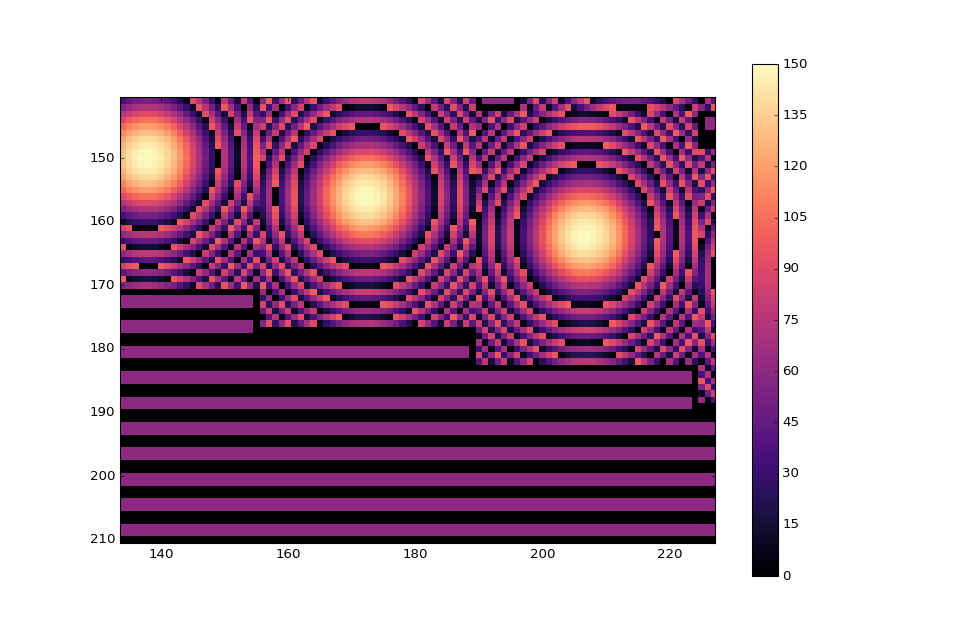

In [14]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.imshow(a, interpolation='none', cmap='magma')
plt.colorbar()